### Marginal Plots

A marginal plot is a scatterplot (sometimes a density plot or other bivariate plot) that has histograms, boxplots, or other distribution visualization layers in the margins of the x- and y-axes. 

It allows studying the relationship between 2 numeric variables. 

You can use the `ggmarginal()` function to add marginal layers to a plot.


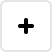
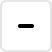
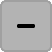
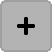
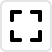
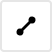
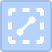
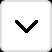
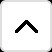
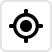

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete
LetsPlot.setup_html()

In [2]:
# The default plot theme and palette.
LetsPlot.set_theme(theme_light())
palette = scale_color_manual(values=["#394449", "#F7C443"]) + scale_fill_manual(values=["#394449", "#F7C443"])

In [3]:
np.random.seed(0)

cov0=[[1, -.8], 
     [-.8, 1]]     
cov1=[[ 10, .1],
       [.1, .1]]

x0, y0 = np.random.multivariate_normal(mean=[-2,0], cov=cov0, size=200).T
x1, y1 = np.random.multivariate_normal(mean=[0,1], cov=cov1, size=200).T

data = dict(
    x = np.concatenate((x0,x1)),
    y = np.concatenate((y0,y1)),
    c = ["A"]*200 + ["B"]*200
)

In [4]:
p = ggplot(data, aes("x", "y", color="c", fill="c")) + geom_point() + palette
p

In [5]:
# Add marginal layers to any side on the plot: 
# - [l]eft 
# - [r]ight 
# - [t]op 
# - [b]ottom 

p + ggmarginal("tr", layer=geom_histogram(color="white")) \
  + ggmarginal("lb", layer=geom_density(size=0))


In [6]:
# Set constant colors to disable the grouping.

p_hist = (p 
          + ggmarginal("tr", layer=geom_histogram(fill="gray", color="white"))
          + ggmarginal("tr", layer=geom_density(fill="rgba(0,0,0,0)", color="red")))
p_hist

In [7]:
# Add marginal boxplots.
# Make margins smaller using the parameter `size`.

p_hist + ggmarginal("lb", size=0.03, layer=geom_boxplot(fill="white", color="black")) 


In [8]:
# Combine marginal violin and boxplot.
# Make margins much larger.

p + ggmarginal("rb", size=0.4, layer=geom_violin(trim=False, color="black")) \
  + ggmarginal("rb", layer=geom_boxplot(aes(group="c"), fill="white", color="white", 
                                        alpha=.25, outlier_color="red", width=.2))


In [9]:
# Show marginal densities on a 2D-density plot.

ggplot(data, aes("x", "y")) + geom_density2df(aes(fill="..level..")) + coord_cartesian() \
 + ggmarginal("tr", layer=geom_area(stat="density"))

In [10]:
# A marginal plot with a significant number of groups on margins. 

mpg = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
mpg.head(3)

Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact

In [12]:
plot_settings = (ggsize(900, 700) +
                 theme(plot_background=element_rect(fill="#eaeaea"), 
                       legend_background=element_rect(fill="#eaeaea")))

(ggplot(mpg, aes("cty", "hwy"))
    + geom_point(aes(fill="manufacturer"), size=7, shape=21, alpha=.5, color="black", position=position_jitter())
    + ggmarginal("tr", size=0.3, 
                 layer=geom_boxplot(aes(fill=as_discrete("manufacturer", order_by="..lower..")), width=0.5))
    + plot_settings) 
